In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [2]:
tweets = pd.read_csv('Elon_musk.csv', encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop('Unnamed: 0', axis = 1, inplace = True)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [6]:
# clean text data
tweets["Text"] = tweets["Text"].apply(lambda x: clean_text(x))

In [14]:
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
tweets["sentiments"] = tweets["Text"].apply(lambda x: sid.polarity_scores(x))
tweets = pd.concat([tweets.drop(['sentiments'], axis=1), tweets['sentiments'].apply(pd.Series)], axis = 1)

tweets

,Text,neg,neu,pos,compound
0,im alien,0.000,1.000,0.000,0.0000
1,id_aa_carmack ray trace cyberpunk hdr next-lev...,0.000,1.000,0.000,0.0000
2,joerogan spotify great interview,0.000,0.423,0.577,0.6249
3,doge underestimate,0.688,0.312,0.000,-0.2960
4,teslacn congratulation tesla china amazing exe...,0.000,0.510,0.490,0.8271
...,...,...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.294,0.412,0.294,-0.0000
1995,ppathole make sure read ur term amp condition ...,0.000,0.620,0.380,0.5994
1996,teslagong ppathole samwise gamgee,0.000,1.000,0.000,0.0000
1997,ppathole altho dumb dumber,0.744,0.256,0.000,-0.7003


In [15]:
# add number of characters column
tweets["nb_chars"] = tweets["Text"].apply(lambda x: len(x))

# add number of words column
tweets["nb_words"] = tweets["Text"].apply(lambda x: len(x.split(" ")))

tweets

,Text,neg,neu,pos,compound,nb_chars,nb_words
0,im alien,0.000,1.000,0.000,0.0000,9,2
1,id_aa_carmack ray trace cyberpunk hdr next-lev...,0.000,1.000,0.000,0.0000,52,7
2,joerogan spotify great interview,0.000,0.423,0.577,0.6249,32,4
3,doge underestimate,0.688,0.312,0.000,-0.2960,18,2
4,teslacn congratulation tesla china amazing exe...,0.000,0.510,0.490,0.8271,72,10
...,...,...,...,...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.294,0.412,0.294,-0.0000,77,12
1995,ppathole make sure read ur term amp condition ...,0.000,0.620,0.380,0.5994,58,10
1996,teslagong ppathole samwise gamgee,0.000,1.000,0.000,0.0000,33,4
1997,ppathole altho dumb dumber,0.744,0.256,0.000,-0.7003,26,4


In [16]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tweets["Text"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each Comment into a vector data
doc2vec_df = tweets["Text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
tweets = pd.concat([tweets, doc2vec_df], axis=1)

In [17]:
tweets

,Text,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,im alien,0.000,1.000,0.000,0.0000,9,2,-0.022789,0.073960,0.062814,-0.063894,0.079819
1,id_aa_carmack ray trace cyberpunk hdr next-lev...,0.000,1.000,0.000,0.0000,52,7,0.141949,0.147880,0.079802,-0.013260,-0.066300
2,joerogan spotify great interview,0.000,0.423,0.577,0.6249,32,4,0.000372,-0.031732,-0.029386,-0.022349,-0.039032
3,doge underestimate,0.688,0.312,0.000,-0.2960,18,2,0.045538,0.097970,0.037500,-0.017964,-0.059113
4,teslacn congratulation tesla china amazing exe...,0.000,0.510,0.490,0.8271,72,10,0.020111,0.146930,0.025372,-0.041487,0.048395
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.294,0.412,0.294,-0.0000,77,12,0.046221,0.154193,0.022051,-0.073029,0.037505
1995,ppathole make sure read ur term amp condition ...,0.000,0.620,0.380,0.5994,58,10,0.056131,0.104714,0.131771,-0.146155,0.085545
1996,teslagong ppathole samwise gamgee,0.000,1.000,0.000,0.0000,33,4,0.107075,-0.007433,-0.056326,0.018957,0.064538
1997,ppathole altho dumb dumber,0.744,0.256,0.000,-0.7003,26,4,0.061744,0.007091,-0.026845,-0.060208,0.018413


In [19]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(tweets["Text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = tweets.index
tweets = pd.concat([tweets, tfidf_df], axis=1)

In [20]:
tweets

,Text,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,...,word_wholemarsblog,word_work,word_would,word_wow,word_yeah,word_year,word_yes,word_you,word_yup,word_zero
0,im alien,0.000,1.000,0.000,0.0000,9,2,-0.022789,0.073960,0.062814,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,id_aa_carmack ray trace cyberpunk hdr next-lev...,0.000,1.000,0.000,0.0000,52,7,0.141949,0.147880,0.079802,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,joerogan spotify great interview,0.000,0.423,0.577,0.6249,32,4,0.000372,-0.031732,-0.029386,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,doge underestimate,0.688,0.312,0.000,-0.2960,18,2,0.045538,0.097970,0.037500,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,teslacn congratulation tesla china amazing exe...,0.000,0.510,0.490,0.8271,72,10,0.020111,0.146930,0.025372,...,0.0,0.0,0.0,0.0,0.0,0.416667,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.294,0.412,0.294,-0.0000,77,12,0.046221,0.154193,0.022051,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1995,ppathole make sure read ur term amp condition ...,0.000,0.620,0.380,0.5994,58,10,0.056131,0.104714,0.131771,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1996,teslagong ppathole samwise gamgee,0.000,1.000,0.000,0.0000,33,4,0.107075,-0.007433,-0.056326,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1997,ppathole altho dumb dumber,0.744,0.256,0.000,-0.7003,26,4,0.061744,0.007091,-0.026845,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


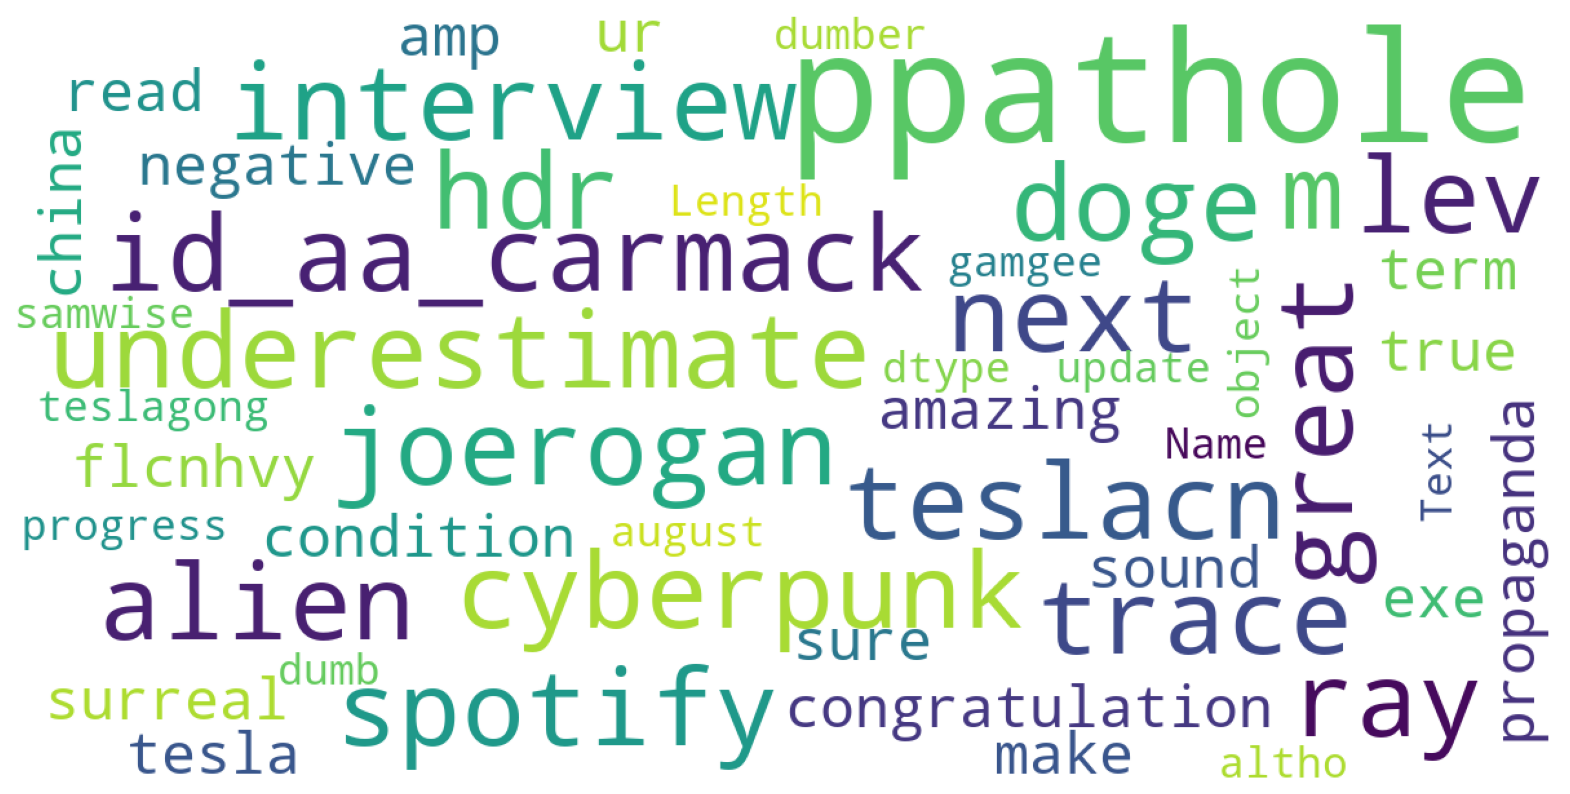

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(tweets["Text"])

In [22]:
# highest positive sentiment tweets (with more than 5 words)
tweets[tweets["nb_words"] >= 5].sort_values("pos", ascending = False)[["Text", "pos"]].head(10)

,Text,pos
410,merry christmas amp happy holiday,0.832
1590,teslarati rate improvement original gpt impres...,0.744
1357,great trip germany support government amp peop...,0.728
126,sure hope thats true tesla spacex,0.727
624,suvitruf archillect haha sexy crop champion time,0.720
1388,gerberkawasaki wow super love astronomy take q...,0.715
1608,teslarati aim make super fun,0.706
770,privilege work people like amp respect much fe...,0.686
903,arctechinc tesla yes helpful thanks beta tester,0.677
1420,nextspaceflight good chance something slip yea...,0.677


In [23]:
# lowest negative sentiment tweets (with more than 5 words)
tweets[tweets["nb_words"] >= 5].sort_values("neg", ascending = False)[["Text", "neg"]].head(10)

,Text,neg
1975,rationaletienne flcnhvy ppathole ihearttesla d...,0.554
1915,write algorithm ever realize negativity bias,0.540
186,naval tyranny also road hell mostly pave bad i...,0.536
541,engineers_feed paint make hell difference,0.535
1935,bbcsciencenews population collapse big danger ...,0.524
1463,try warn dug grave twice fast,0.500
893,pcgamer fear best imo also dead space haunt dream,0.500
941,toadmeister sweden zero death oct,0.494
131,its_menieb live sword die sword,0.494
1429,teslarati much appreciate serious attack,0.484


-----------------

#### Final Observations
So, the tweets have been sorted as positive and negative tweets based on the positive and negative scores given by the sentiment analyzer for each tweet.